In [1]:
# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# LOAD AND EXPLORE DATA

In [11]:
# Load data
data = pd.read_excel(r'C:\Users\kanim\Downloads\healthcare_equipment_data.xlsx')

# Data overview
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   equipment_id  usage_hours  temperature  vibration_level  pressure_level  \
0             1         1200           60              0.5             2.1   
1             2         2400           75              0.8             2.8   
2             3          600           50              0.3             1.9   
3             4         3200           85              1.0             3.5   
4             5          800           55              0.4             2.0   

   last_maintenance  failure  
0               200        0  
1               300        1  
2               100        0  
3               500        1  
4               150        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   equipment_id      20 non-null     int64  
 1   usage_hours       20 non-null     int64  
 2   temperature       20 non-null     int64  
 3   vib

# DATA VISUALIZATION

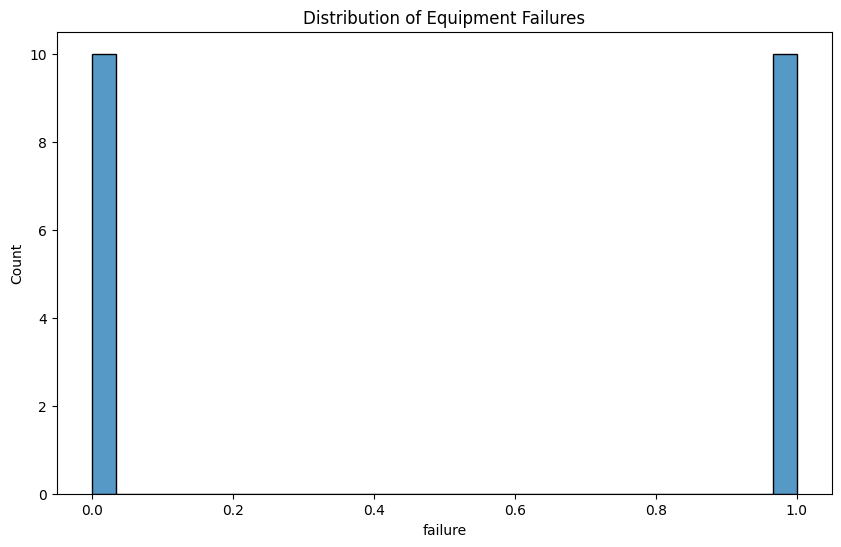

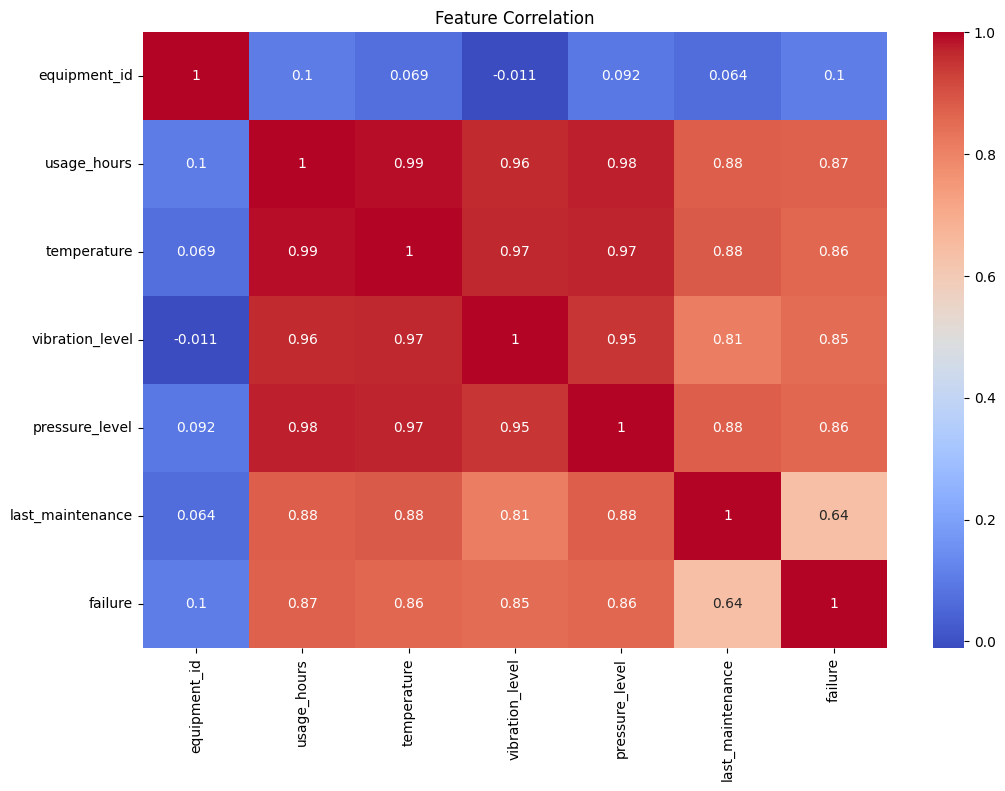

In [12]:
# Plot feature distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['failure'], kde=False, bins=30)
plt.title('Distribution of Equipment Failures')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


# DATA PREPROCESSING

In [13]:
# Handle missing values if necessary
data.fillna(method='ffill', inplace=True)

# Convert categorical data if present
data = pd.get_dummies(data, drop_first=True)

# Split into features (X) and target (y)
X = data.drop('failure', axis=1)
y = data['failure']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


C:\Users\kanim\AppData\Local\Temp\ipykernel_20372\313855493.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# MODEL BUILDING :RANDOM FOREST CLASSIFIER

In [14]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



# FEATURE IMPORTANCE

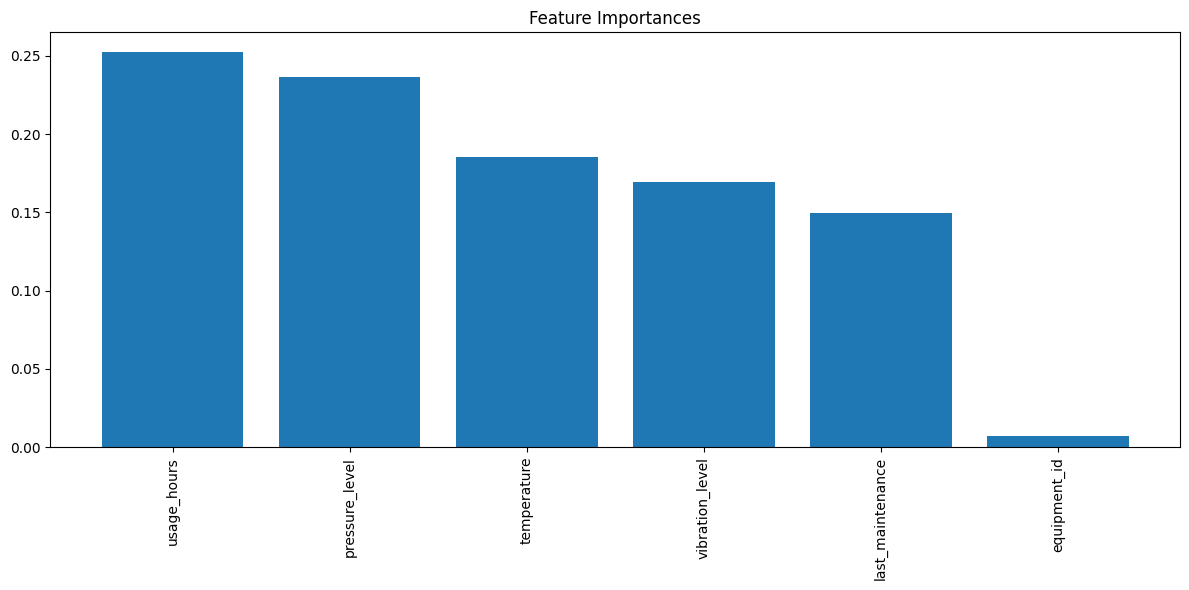

In [15]:
# Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
